## Content
#### 1 Introduction
#### 2 Configuring the detectron2 module and runtime environment
#### 3 Get the Centermask2 repository
#### 4 Writing configuration and training codes
#### 5 Register coco datasets
#### 6 Train and evalute the model
#### 7 Evaluation
#### 8 Prediction

#### 1 Introduction
[CenterMask2](https://github.com/youngwanLEE/centermask2) using [Detectron2](https://github.com/facebookresearch/detectron2) library perform well in object detection and instance segmentation, and the paper also demonstrates good results on the Livecell dataset, so CenterMask2 and Detectron2 are used as training frameworks to select appropriate variants and adjust hyperparameters for cell instance segmentation and prediction.

#### 2 Configuring the detectron2 module and runtime environment
Version compatibility between pytorch and cuda is important, as it is a precondition for detectron2 to install and run. 
The original cuda of kaggle is not suitable for detectron2, so uninstall it first and then install the new version.  
For more information, please see [Detectron2 Tutorials](https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html).

In [1]:
#Install the appropriate detectron2 version according to the existing pytorch and cuda versions
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

# Install detectron2 offline
!pip install --no-index /kaggle/input/detectron2-download-code-for-offline-install-ii/detectron2/detectron2-0.6-cp37-cp37m-linux_x86_64.whl --find-links=/kaggle/input/detectron2-download-code-for-offline-install-ii/detectron2
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION, "cuda_available: ", torch.cuda.is_available() )

# Get the CUDA version
# The GPU needs to be enabled for this to work.
# The CUDA version is in the top right corner.
!nvcc --version
!nvidia-smi

torch:  1.9 ; cuda:  1.9.1
Looking in links: /kaggle/input/detectron2-download-code-for-offline-install-ii/detectron2
Processing /kaggle/input/detectron2-download-code-for-offline-install-ii/detectron2/detectron2-0.6-cp37-cp37m-linux_x86_64.whl
Processing /kaggle/input/detectron2-download-code-for-offline-install-ii/detectron2/pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl
Processing /kaggle/input/detectron2-download-code-for-offline-install-ii/detectron2/fvcore-0.1.5.post20211023-py3-none-any.whl
Processing /kaggle/input/detectron2-download-code-for-offline-install-ii/detectron2/iopath-0.1.9-py3-none-any.whl
Processing /kaggle/input/detectron2-download-code-for-offline-install-ii/detectron2/omegaconf-2.1.1-py3-none-any.whl
Processing /kaggle/input/detectron2-download-code-for-offline-install-ii/detectron2/black-21.4b2-py3-none-any.whl
Processing /kaggle/input/detectron2-download-code-for-offline-install-ii/detectron2/hydra_core-1.1.1-py3-none-any.whl
Processing /kaggle/input/detectron2

#### 3 Get the CenterMask2 Repository
clone CenterMask2 repo and download one of the pretrained variants, add the repo as a datasets. 
The model size, average precision and specific parameter files can be seen in the CenterMask2 [repo](https://github.com/youngwanLEE/centermask2). Taking into account the average precision and computing time, a lightweight model is tested first.

In [2]:
%cd /kaggle/input/centermask2litev39

/kaggle/input/centermask2litev39


#### 4 Writing configuration and training codes
To write the **configuration** file, refer to the  
detectron2 repo:  [detectron2/detectron2/config/defaults.py](https://github.com/facebookresearch/detectron2/blob/main/detectron2/config/defaults.py)  
and CenterMask2 repo: [centermask2/centermask/config/defaults.py](https://github.com/youngwanLEE/centermask2/blob/master/centermask/config/defaults.py) 

In [3]:
%%writefile /kaggle/working/test.yaml
CUDNN_BENCHMARK: false
DATALOADER:
    ASPECT_RATIO_GROUPING: true
    FILTER_EMPTY_ANNOTATIONS: true
    NUM_WORKERS: 2
    REPEAT_THRESHOLD: 0.0
    SAMPLER_TRAIN: TrainingSampler
DATASETS:
    PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
    PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
    PROPOSAL_FILES_TEST: []
    PROPOSAL_FILES_TRAIN: []
    TEST:
    - test
    TRAIN:
    - train
GLOBAL:
    HACK: 1.0
INPUT:
    CROP:
        ENABLED: false
        SIZE:
        - 0.9
        - 0.9
        TYPE: relative_range
    FORMAT: BGR
    MASK_FORMAT: polygon
    MAX_SIZE_TEST: 1333
    MAX_SIZE_TRAIN: 1333
    MIN_SIZE_TEST: 800
    MIN_SIZE_TRAIN:
    - 480
    - 512
    - 640
    MIN_SIZE_TRAIN_SAMPLING: choice
    RANDOM_FLIP: horizontal
MODEL:
    ANCHOR_GENERATOR:
        ANGLES:
        - - -90
            - 0
            - 90
        ASPECT_RATIOS:
        - - 0.5
            - 1.0
            - 2.0
        NAME: DefaultAnchorGenerator
        OFFSET: 0.0
        SIZES:
        - - 32
            - 64
            - 128
            - 256
            - 512
    BACKBONE:
        FREEZE_AT: 0
        NAME: build_fcos_vovnet_fpn_backbone
    DEVICE: cuda
    FCOS:
        CENTER_SAMPLE: true
        FPN_STRIDES:
        - 8
        - 16
        - 32
        - 64
        - 128
        INFERENCE_TH_TEST: 0.05
        INFERENCE_TH_TRAIN: 0.05
        IN_FEATURES:
        - p3
        - p4
        - p5
        - p6
        - p7
        LOC_LOSS_TYPE: giou
        LOSS_ALPHA: 0.25
        LOSS_GAMMA: 2.0
        NMS_TH: 0.6
        NORM: GN
        NUM_BOX_CONVS: 4
        NUM_CLASSES: 80
        NUM_CLS_CONVS: 4
        NUM_SHARE_CONVS: 0
        POST_NMS_TOPK_TEST: 800
        POST_NMS_TOPK_TRAIN: 800
        POS_RADIUS: 1.5
        PRE_NMS_TOPK_TEST: 1000
        PRE_NMS_TOPK_TRAIN: 1000
        PRIOR_PROB: 0.01
        SIZES_OF_INTEREST:
        - 64
        - 128
        - 256
        - 512
        THRESH_WITH_CTR: false
        TOP_LEVELS: 2
        USE_DEFORMABLE: false
        USE_RELU: true
        USE_SCALE: true
    FPN:
        FUSE_TYPE: sum
        IN_FEATURES:
        - stage3
        - stage4
        - stage5
        NORM: ''
        OUT_CHANNELS: 256
    KEYPOINT_ON: false
    LOAD_PROPOSALS: false
    MASKIOU_LOSS_WEIGHT: 1.0
    MASKIOU_ON: true
    MASK_ON: true
    META_ARCHITECTURE: GeneralizedRCNN
    MOBILENET: false
    PANOPTIC_FPN:
        COMBINE:
            ENABLED: true
            INSTANCES_CONFIDENCE_THRESH: 0.5
            OVERLAP_THRESH: 0.5
            STUFF_AREA_LIMIT: 4096
        INSTANCE_LOSS_WEIGHT: 1.0
    PIXEL_MEAN:
    - 103.53
    - 116.28
    - 123.675
    PIXEL_STD:
    - 1.0
    - 1.0
    - 1.0
    PROPOSAL_GENERATOR:
        MIN_SIZE: 0
        NAME: FCOS
    RESNETS:
        DEFORM_MODULATED: false
        DEFORM_NUM_GROUPS: 1
        DEFORM_ON_PER_STAGE:
        - false
        - false
        - false
        - false
        DEPTH: 50
        NORM: FrozenBN
        NUM_GROUPS: 1
        OUT_FEATURES:
        - res4
        RES2_OUT_CHANNELS: 256
        RES5_DILATION: 1
        STEM_OUT_CHANNELS: 64
        STRIDE_IN_1X1: true
        WIDTH_PER_GROUP: 64
    RETINANET:
        BBOX_REG_LOSS_TYPE: smooth_l1
        BBOX_REG_WEIGHTS: &id001
        - 1.0
        - 1.0
        - 1.0
        - 1.0
        FOCAL_LOSS_ALPHA: 0.25
        FOCAL_LOSS_GAMMA: 2.0
        IN_FEATURES:
        - p3
        - p4
        - p5
        - p6
        - p7
        IOU_LABELS:
        - 0
        - -1
        - 1
        IOU_THRESHOLDS:
        - 0.4
        - 0.5
        NMS_THRESH_TEST: 0.5
        NORM: ''
        NUM_CLASSES: 80
        NUM_CONVS: 4
        PRIOR_PROB: 0.01
        SCORE_THRESH_TEST: 0.05
        SMOOTH_L1_LOSS_BETA: 0.1
        TOPK_CANDIDATES_TEST: 1000
    ROI_BOX_CASCADE_HEAD:
        BBOX_REG_WEIGHTS:
        - - 10.0
            - 10.0
            - 5.0
            - 5.0
        - - 20.0
            - 20.0
            - 10.0
            - 10.0
        - - 30.0
            - 30.0
            - 15.0
            - 15.0
        IOUS:
        - 0.5
        - 0.6
        - 0.7
    ROI_BOX_HEAD:
        BBOX_REG_LOSS_TYPE: smooth_l1
        BBOX_REG_LOSS_WEIGHT: 1.0
        BBOX_REG_WEIGHTS:
        - 10.0
        - 10.0
        - 5.0
        - 5.0
        CLS_AGNOSTIC_BBOX_REG: false
        CONV_DIM: 256
        FC_DIM: 1024
        NAME: ''
        NORM: ''
        NUM_CONV: 0
        NUM_FC: 0
        POOLER_RESOLUTION: 14
        POOLER_SAMPLING_RATIO: 0
        POOLER_TYPE: ROIAlignV2
        SMOOTH_L1_BETA: 0.0
        TRAIN_ON_PRED_BOXES: false
    ROI_HEADS:
        BATCH_SIZE_PER_IMAGE: 512
        IN_FEATURES:
        - p3
        - p4
        - p5
        IOU_LABELS:
        - 0
        - 1
        IOU_THRESHOLDS:
        - 0.5
        NAME: CenterROIHeads
        NMS_THRESH_TEST: 0.5
        NUM_CLASSES: 80
        POSITIVE_FRACTION: 0.25
        PROPOSAL_APPEND_GT: true
        SCORE_THRESH_TEST: 0.05
    ROI_KEYPOINT_HEAD:
        ASSIGN_CRITERION: ratio
        CONV_DIMS:
        - 512
        - 512
        - 512
        - 512
        - 512
        - 512
        - 512
        - 512
        IN_FEATURES:
        - p2
        - p3
        - p4
        - p5
        LOSS_WEIGHT: 1.0
        MIN_KEYPOINTS_PER_IMAGE: 1
        NAME: KRCNNConvDeconvUpsampleHead
        NORMALIZE_LOSS_BY_VISIBLE_KEYPOINTS: true
        NUM_KEYPOINTS: 17
        POOLER_RESOLUTION: 14
        POOLER_SAMPLING_RATIO: 0
        POOLER_TYPE: ROIAlignV2
    ROI_MASKIOU_HEAD:
        CONV_DIM: 256
        NAME: MaskIoUHead
        NUM_CONV: 4
    ROI_MASK_HEAD:
        ASSIGN_CRITERION: ratio
        CLS_AGNOSTIC_MASK: false
        CONV_DIM: 256
        NAME: SpatialAttentionMaskHead
        NORM: ''
        NUM_CONV: 4
        POOLER_RESOLUTION: 14
        POOLER_SAMPLING_RATIO: 0
        POOLER_TYPE: ROIAlignV2
    RPN:
        BATCH_SIZE_PER_IMAGE: 256
        BBOX_REG_LOSS_TYPE: smooth_l1
        BBOX_REG_LOSS_WEIGHT: 1.0
        BBOX_REG_WEIGHTS: *id001
        BOUNDARY_THRESH: -1
        CONV_DIMS:
        - -1
        HEAD_NAME: StandardRPNHead
        IN_FEATURES:
        - res4
        IOU_LABELS:
        - 0
        - -1
        - 1
        IOU_THRESHOLDS:
        - 0.3
        - 0.7
        LOSS_WEIGHT: 1.0
        NMS_THRESH: 0.7
        POSITIVE_FRACTION: 0.5
        POST_NMS_TOPK_TEST: 1000
        POST_NMS_TOPK_TRAIN: 2000
        PRE_NMS_TOPK_TEST: 6000
        PRE_NMS_TOPK_TRAIN: 12000
        SMOOTH_L1_BETA: 0.0
    SEM_SEG_HEAD:
        COMMON_STRIDE: 4
        CONVS_DIM: 128
        IGNORE_VALUE: 255
        IN_FEATURES:
        - p2
        - p3
        - p4
        - p5
        LOSS_WEIGHT: 1.0
        NAME: SemSegFPNHead
        NORM: GN
        NUM_CLASSES: 54
    VOVNET:
        BACKBONE_OUT_CHANNELS: 256
        CONV_BODY: V-39-eSE
        DEFORMABLE_GROUPS: 1
        NORM: FrozenBN
        OUT_CHANNELS: 256
        OUT_FEATURES:
        - stage3
        - stage4
        - stage5
        STAGE_WITH_DCN:
        - false
        - false
        - false
        - false
        WITH_MODULATED_DCN: false
    WEIGHTS: 'kaggle/input/centermask2litev39/LIVECell_anchor_free_shsy5y_model.pth'
OUTPUT_DIR: ./output
SEED: -1
SOLVER:
    AMP:
        ENABLED: false
    BASE_LR: 0.01
    BIAS_LR_FACTOR: 1.0
    CHECKPOINT_PERIOD: 5000
    CLIP_GRADIENTS:
        CLIP_TYPE: value
        CLIP_VALUE: 1.0
        ENABLED: false
        NORM_TYPE: 2.0
    GAMMA: 0.1
    IMS_PER_BATCH: 8
    LR_SCHEDULER_NAME: WarmupMultiStepLR
    MAX_ITER: 7000
    MOMENTUM: 0.9
    NESTEROV: false
    REFERENCE_WORLD_SIZE: 0
    STEPS:
    - 60000
    - 80000
    WARMUP_FACTOR: 0.001
    WARMUP_ITERS: 1000
    WARMUP_METHOD: linear
    WEIGHT_DECAY: 0.0001
    WEIGHT_DECAY_BIAS: null
    WEIGHT_DECAY_NORM: 0.0
TEST:
    AUG:
        ENABLED: false
        FLIP: true
        MAX_SIZE: 4000
        MIN_SIZES:
        - 400
        - 500
        - 600
        - 700
        - 800
        - 900
        - 1000
        - 1100
        - 1200
    DETECTIONS_PER_IMAGE: 600
    EVAL_PERIOD: 600
    EXPECTED_RESULTS: []
    KEYPOINT_OKS_SIGMAS: []
    PRECISE_BN:
        ENABLED: false
        NUM_ITER: 200
VERSION: 2
VIS_PERIOD: 0


Writing /kaggle/working/test.yaml


To write the **Training** codes, refer to CenterMask2 repo [train_net.py](https://github.com/youngwanLEE/centermask2/blob/master/train_net.py)

In [4]:
# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved
# Modified by Youngwan Lee (ETRI), 2020. All Rights Reserved.

# Some basic setup:
import detectron2
import logging
import os
from collections import OrderedDict
import torch
import numpy as np
import os, json, cv2, random, re

import detectron2.utils.comm as comm
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances, load_coco_json
from detectron2.engine import DefaultTrainer, DefaultPredictor, default_argument_parser, default_setup, hooks, launch
from detectron2.evaluation import (
    COCOPanopticEvaluator,
    DatasetEvaluators,
    LVISEvaluator,
    PascalVOCDetectionEvaluator,
    SemSegEvaluator,
    verify_results,
)

import os
import sys
module_path = os.path.abspath(os.path.join('../input/centermask2litev39'))
if module_path not in sys.path:
    sys.path.append(module_path)
from centermask.evaluation import (
    COCOEvaluator,
    CityscapesInstanceEvaluator,
    CityscapesSemSegEvaluator
)

#import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.modeling import GeneralizedRCNNWithTTA
from detectron2.checkpoint import DetectionCheckpointer
from centermask.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

class Trainer(DefaultTrainer):
    """
    This is the same Trainer except that we rewrite the
    `build_train_loader` method.
    """

    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        """
        Create evaluator(s) for a given dataset.
        This uses the special metadata "evaluator_type" associated with each builtin dataset.
        For your own dataset, you can simply create an evaluator manually in your
        script and do not have to worry about the hacky if-else logic here.
        
        :param cls: classes
        :param cfg: configs
        :param dataset_name: name of dataset
        :param output_folder: folder that saves output data
        """
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        evaluator_list = []
        evaluator_list.append(COCOEvaluator(dataset_name, output_dir=output_folder))
        evaluator_type = MetadataCatalog.get(dataset_name).evaluator_type
        if len(evaluator_list) == 0:
            raise NotImplementedError(
                "no Evaluator for the dataset {} with the type {}".format(
                    dataset_name, evaluator_type
                )
            )
        elif len(evaluator_list) == 1:
            return evaluator_list[0]
        return DatasetEvaluators(evaluator_list)

    @classmethod
    def test_with_TTA(cls, cfg, model):
        logger = logging.getLogger("detectron2.trainer")
        # In the end of training, run an evaluation with TTA
        # Only support some R-CNN models.
        logger.info("Running inference with test-time augmentation ...")
        model = GeneralizedRCNNWithTTA(cfg, model)
        evaluators = [
            cls.build_evaluator(
                cfg, name, output_folder=os.path.join(cfg.OUTPUT_DIR, "inference_TTA")
            )
            for name in cfg.DATASETS.TEST
        ]
        res = cls.test(cfg, model, evaluators)
        res = OrderedDict({k + "_TTA": v for k, v in res.items()})
        return res

def setup(args):
    """
    Create configs and perform basic setups.
    """
    cfg = get_cfg()
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    cfg.freeze()
    default_setup(cfg, args)
    return cfg


def main(args):
    cfg = setup(args)

    if args.eval_only:
        model = Trainer.build_model(cfg)
        DetectionCheckpointer(model, save_dir=cfg.OUTPUT_DIR).resume_or_load(
            cfg.MODEL.WEIGHTS, resume=args.resume
        )
        res = Trainer.test(cfg, model)
        if cfg.TEST.AUG.ENABLED:
            res.update(Trainer.test_with_TTA(cfg, model))
        if comm.is_main_process():
            verify_results(cfg, res)
        return res

    """
    If you'd like to do anything fancier than the standard training logic,
    consider writing your own training loop or subclassing the trainer.
    """
    trainer = Trainer(cfg)
    trainer.resume_or_load(resume=args.resume)
    if cfg.TEST.AUG.ENABLED:
        trainer.register_hooks(
            [hooks.EvalHook(0, lambda: trainer.test_with_TTA(cfg, trainer.model))]
        )
    return trainer.train()

Set the configuration for the model.  
It will conduct training and evaluation.

In [5]:
cfg = get_cfg()
%cd /kaggle/working
cfg.merge_from_file("./test.yaml")
cfg.freeze()
default_setup(cfg, 'Namespace(num_gpus=1, opts=[\'MODEL.WEIGHTS\', \'centermask2_lite_V_39_eSE_FPN_ms_4x.pth\'], resume=True')

/kaggle/working
[12/27 18:20:54 detectron2]: Rank of current process: 0. World size: 1
[12/27 18:20:56 detectron2]: Environment info:
----------------------  -------------------------------------------------------------------------------
sys.platform            linux
Python                  3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) [GCC 9.4.0]
numpy                   1.19.5
detectron2              0.6 @/opt/conda/lib/python3.7/site-packages/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.0
detectron2 arch flags   6.0
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.9.1 @/opt/conda/lib/python3.7/site-packages/torch
PyTorch debug build     False
GPU available           Yes
GPU 0                   Tesla P100-PCIE-16GB (arch=6.0)
Driver version          450.119.04
CUDA_HOME               /usr/local/cuda
Pillow                  8.2.0
torchvision             0.10.1 @/opt/conda/lib/python3.7/site-packages/torchvision
torchvision 

#### 5 Register coco datasets

How to register coco datasets, refer to:  
[Use Custom Datasets](https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html)  
[Use Builtin Datasets](https://github.com/facebookresearch/detectron2/tree/main/datasets)  
cell-clean-astro-mask datasets is from [Sartorius: Create COCO annotations](https://www.kaggle.com/mistag/sartorius-create-coco-annotations/data) by GEIR DRANGE 

In [6]:
# Dataset registration
from detectron2.data.datasets import register_coco_instances

register_coco_instances('train', {}, 
                       '/kaggle/input/cellcleanastromask/train_fold_0.json',
                        '/kaggle/input/sartorius-cell-instance-segmentation/train')
register_coco_instances('test', {}, 
                        '/kaggle/input/cellcleanastromask/test_fold_0.json',
                        '/kaggle/input/sartorius-cell-instance-segmentation/test')

CLASSES = ["shsy5y", "astro", "cort"]
MetadataCatalog.get("train").thing_classes = CLASSES
MetadataCatalog.get("train").evaluator_type = "coco"
MetadataCatalog.get("test").thing_classes = CLASSES
MetadataCatalog.get("test").evaluator_type = "coco"

[12/27 18:20:57 d2.data.datasets.coco]: Loaded 122 images in COCO format from /kaggle/input/cellcleanastromask/test_fold_0.json


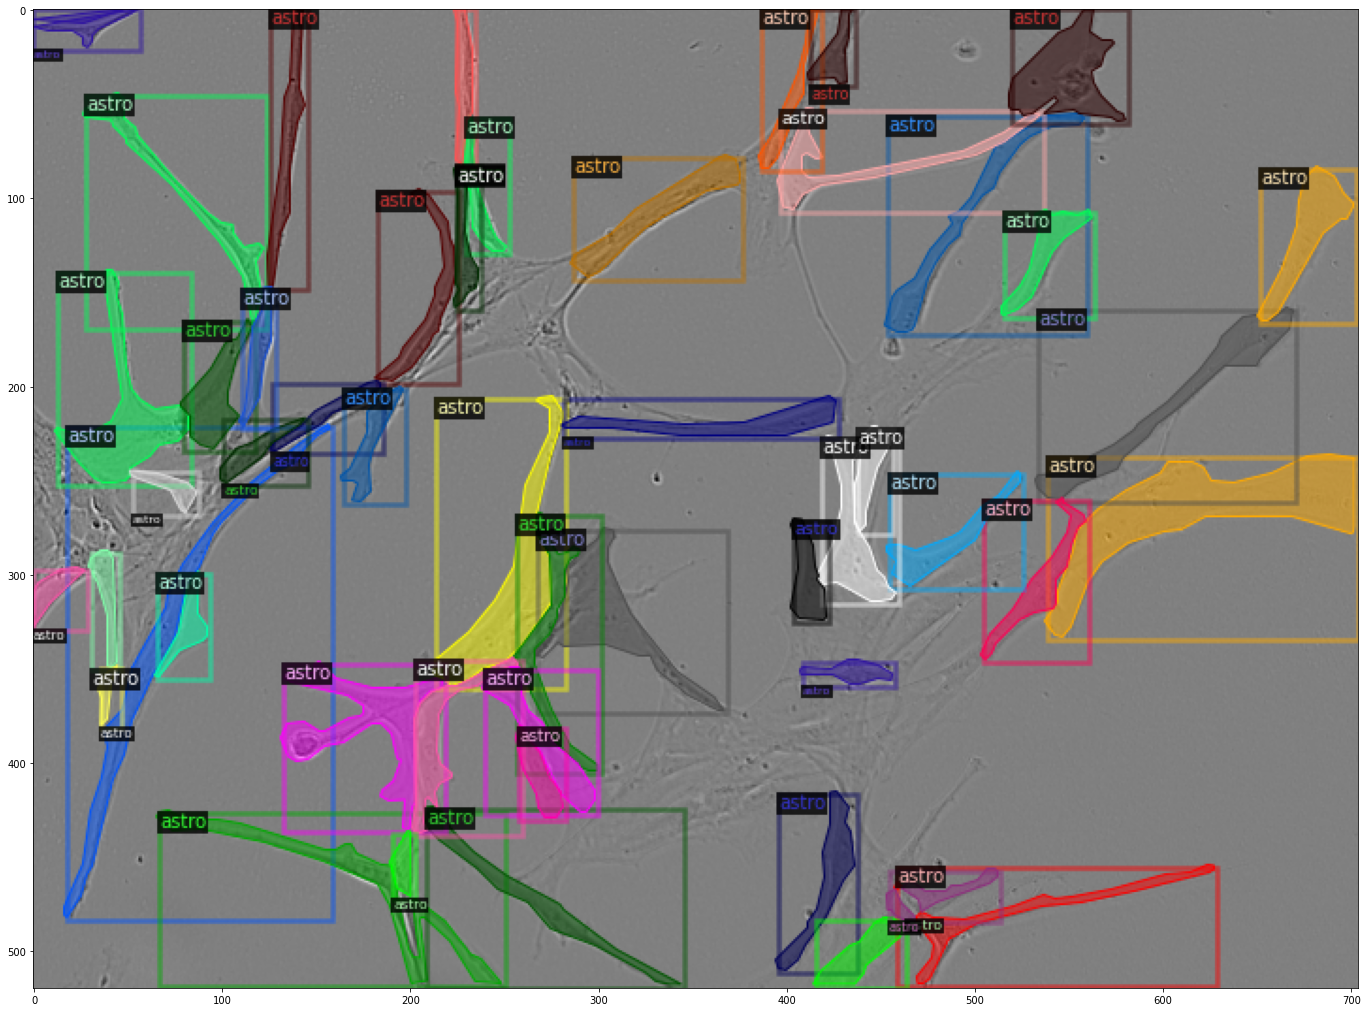

In [7]:
test_ds = DatasetCatalog.get('test')
meta_ds = MetadataCatalog.get("test")
test_sample = test_ds[25]
img = cv2.imread(test_sample["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=meta_ds)
output = visualizer.draw_dataset_dict(test_sample)

plt.figure(figsize = (24,18)) 
plt.imshow(output.get_image()[:, :, ::-1]);

#### 6 Train and evaluate the model
The previous configuration selected to train and evaluate the model with the default evaluator.

In [8]:
!cp -R /kaggle/input/centermask2litev39/last_checkpoint /kaggle/working
from detectron2.modeling import build_model
model = build_model(cfg)  # returns a torch.nn.Module

from detectron2.checkpoint import DetectionCheckpointer
DetectionCheckpointer(model).load('/kaggle/input/centermask2litev39/LIVECell_anchor_free_shsy5y_model.pth')  # load a file, usually from cfg.MODEL.WEIGHTS

checkpointer = DetectionCheckpointer(model, save_dir="output")
checkpointer.save("Livecell_pretrained_shsy5y_model.pth")  # save to output/model_20000.pth


trainer = Trainer(cfg)
trainer.resume_or_load(resume=True)

if cfg.TEST.AUG.ENABLED:
    trainer.register_hooks(
        [hooks.EvalHook(0, lambda: trainer.test_with_TTA(cfg, trainer.model))]
    )

#To avoid CUDA out-of-memory error, clear the cache in advance
torch.cuda.empty_cache()

trainer.train()

[12/27 18:21:03 fvcore.common.checkpoint]: [Checkpointer] Loading from /kaggle/input/centermask2litev39/LIVECell_anchor_free_shsy5y_model.pth ...
WARNING [12/27 18:21:10 fvcore.common.checkpoint]: Skip loading parameter 'proposal_generator.fcos_head.cls_logits.weight' to the model due to incompatible shapes: (1, 256, 3, 3) in the checkpoint but (80, 256, 3, 3) in the model! You might want to double check if this is expected.
WARNING [12/27 18:21:10 fvcore.common.checkpoint]: Skip loading parameter 'proposal_generator.fcos_head.cls_logits.bias' to the model due to incompatible shapes: (1,) in the checkpoint but (80,) in the model! You might want to double check if this is expected.
WARNING [12/27 18:21:10 fvcore.common.checkpoint]: Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (1, 256, 1, 1) in the checkpoint but (80, 256, 1, 1) in the model! You might want to double check if this is expected.
WARNING [12/27 18:21:10 fvcore.common

#### 7 Evaluation
Analysis the learing process and visualization, code from [[train] Sartorius: Detectron2 + CenterMask2](https://www.kaggle.com/mistag/train-sartorius-detectron2-centermask2/notebook)

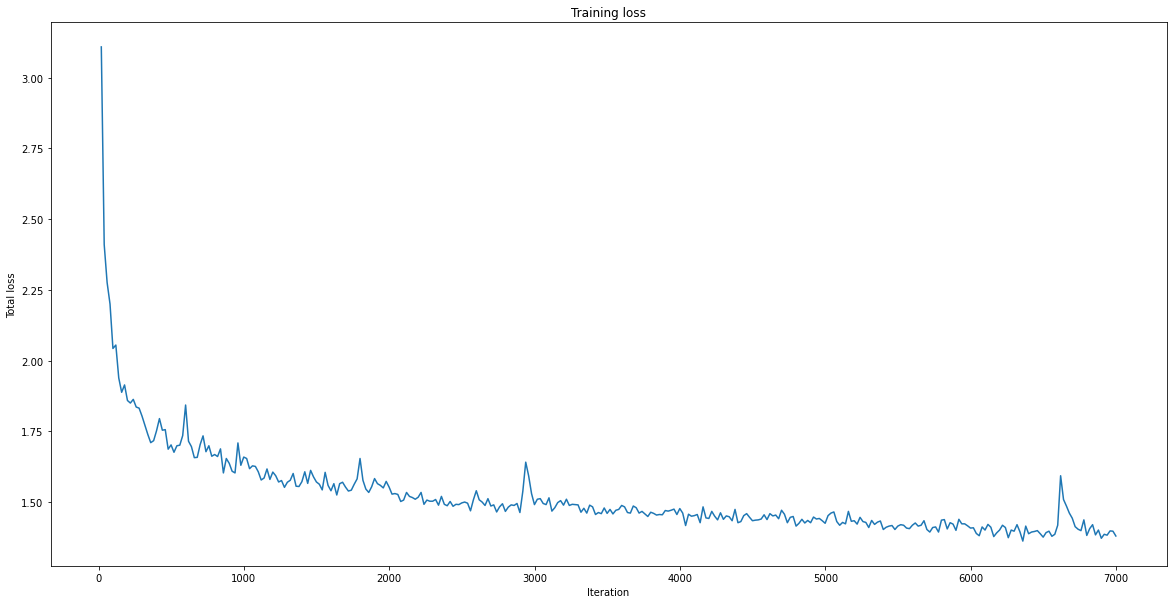

In [9]:
import re
# read log file
with open('./output/log.txt', 'r') as f:
    log = f.read()
# extract training loss
lines = re.findall('iter: [0-9]*  total_loss: [.0-9]*', log)
it, loss = [], []
for i in range(len(lines)):
    res = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", lines[i])
    it.append(int(res[0]))
    loss.append(float(res[1]))
plt.figure(figsize = (20,10))
plt.plot(it, loss)
plt.xlabel('Iteration')
plt.ylabel('Total loss')
plt.title('Training loss');

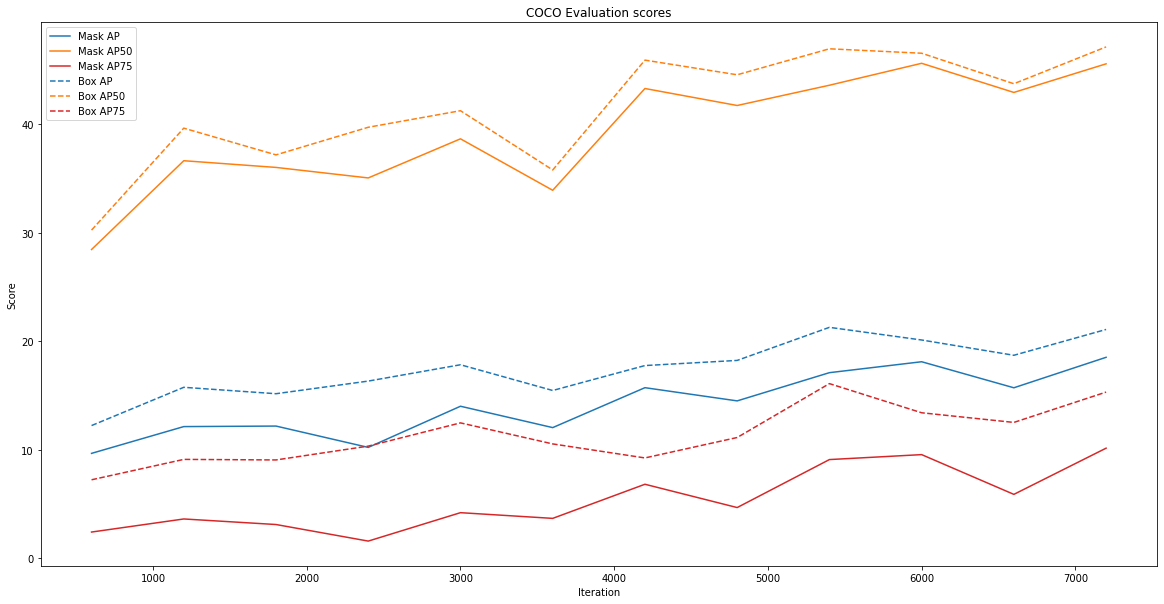

In [10]:
# Then we do evaluation scores
raw = re.findall('copypaste: [.,0-9]*', log)
boxes, segs = [], []
idx = 0
for s in raw:
    if len(s) > 20:
        nums = [float(i) for i in s.strip('copypaste: ').split(',')]
        if idx == 0:
            boxes.append(nums)
        else:
            segs.append(nums)
        idx = (idx + 1) % 2
boxes, segs = np.asarray(boxes), np.asarray(segs)
x = (np.arange(0, len(segs[:,0])) *600) + 600
plt.figure(figsize = (20,10))
x = (np.arange(0, len(segs[:,0])) *600) + 600
plt.plot(x, segs[:,0], label='Mask AP', color='tab:blue')
plt.plot(x, segs[:,1], label='Mask AP50', color='tab:orange')
plt.plot(x, segs[:,2], label='Mask AP75', color='tab:red')
plt.plot(x, boxes[:,0], label='Box AP', linestyle='--', color='tab:blue')
plt.plot(x, boxes[:,1], label='Box AP50', linestyle='--', color='tab:orange')
plt.plot(x, boxes[:,2], label='Box AP75', linestyle='--', color='tab:red')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('COCO Evaluation scores');

#### 8 Prediction 
Check a few predictions, code from [Positive score with Detectron 2/3 - Training](https://www.kaggle.com/slawekbiel/positive-score-with-detectron-2-3-training).

[12/27 22:13:41 fvcore.common.checkpoint]: [Checkpointer] Loading from ./output/model_final.pth ...
[12/27 22:13:42 d2.data.datasets.coco]: Loaded 122 images in COCO format from /kaggle/input/cellcleanastromask/test_fold_0.json


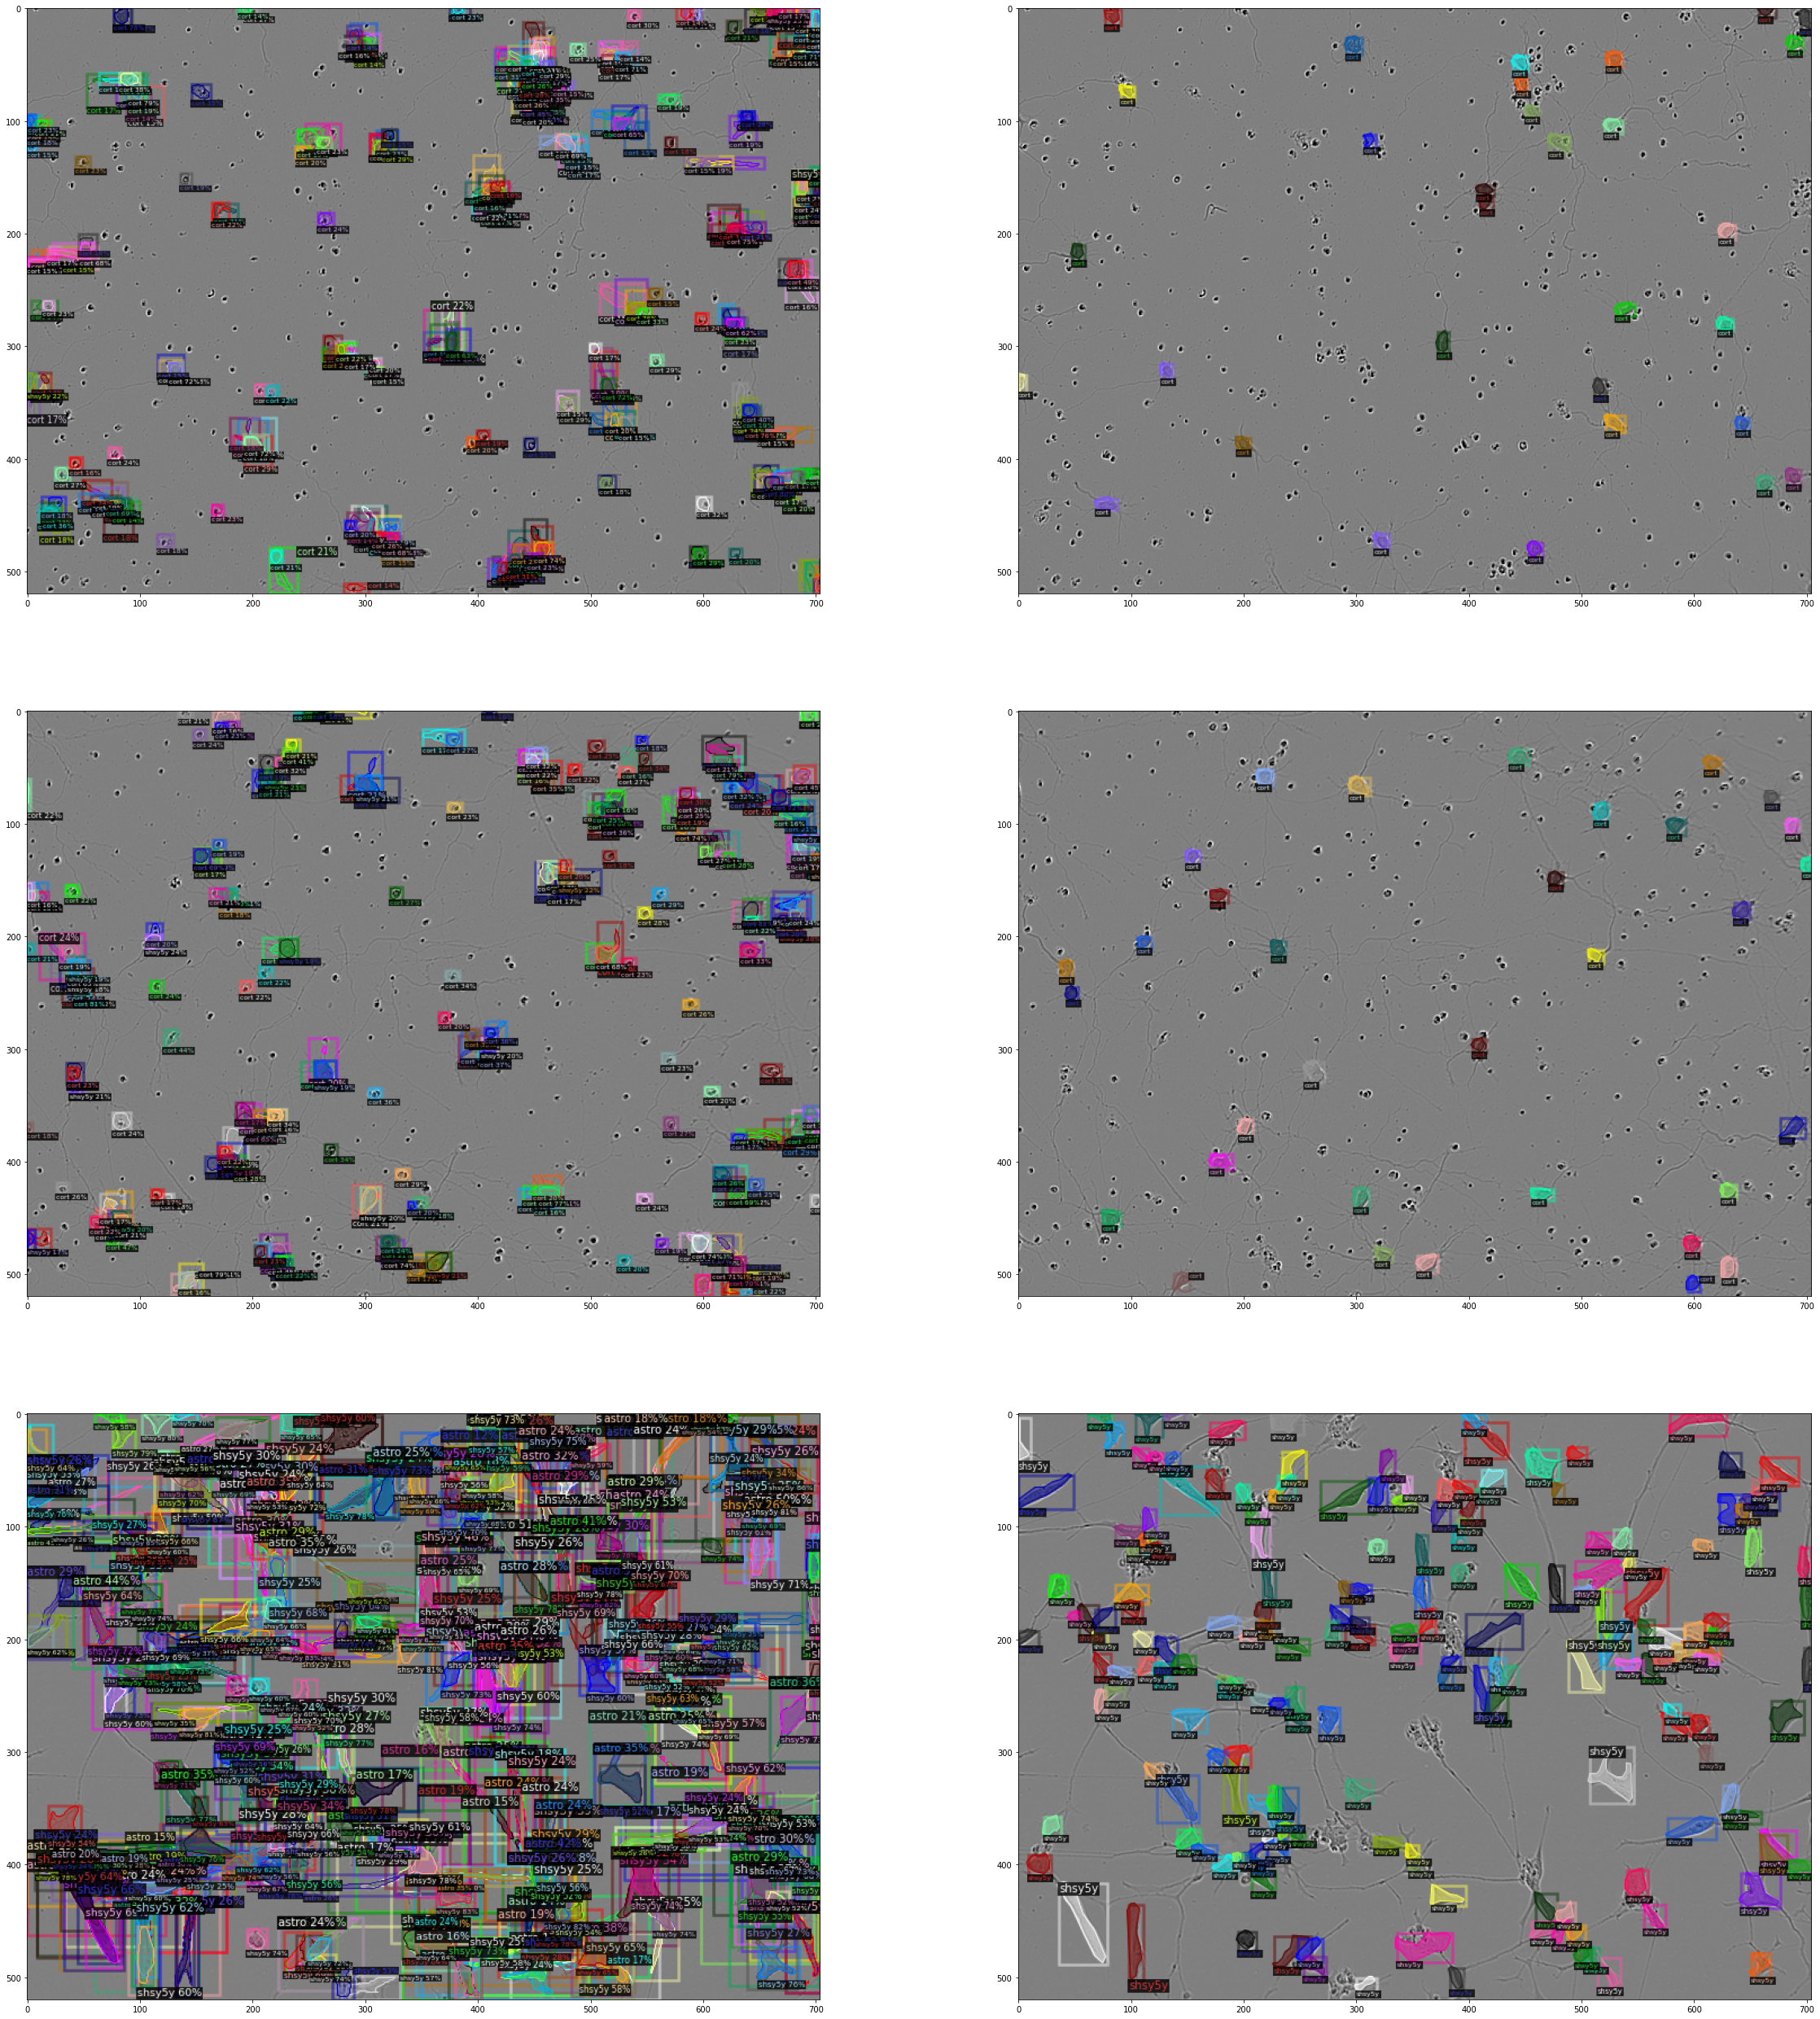

In [11]:
import random

cfg.defrost()
cfg.MODEL.WEIGHTS = './output/model_final.pth'  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
predictor = DefaultPredictor(cfg)
dataset_dicts = DatasetCatalog.get('test')
outs = []
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata = MetadataCatalog.get('test'), 
                    
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out_pred = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    visualizer = Visualizer(im[:, :, ::-1], metadata=MetadataCatalog.get('test'))
    out_target = visualizer.draw_dataset_dict(d)
    outs.append(out_pred)
    outs.append(out_target)
_,axs = plt.subplots(len(outs)//2,2,figsize=(40,45))
for ax, out in zip(axs.reshape(-1), outs):
    ax.imshow(out.get_image()[:, :, ::-1])

#### References
  
@inproceedings{lee2019energy,  
  title = {An Energy and GPU-Computation Efficient Backbone Network for Real-Time Object Detection},  
  author = {Lee, Youngwan and Hwang, Joong-won and Lee, Sangrok and Bae, Yuseok and Park, Jongyoul},  
  booktitle = {Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition Workshops},  
  year = {2019} 
}  

@inproceedings{lee2020centermask,  
  title={CenterMask: Real-Time Anchor-Free Instance Segmentation},  
  author={Lee, Youngwan and Park, Jongyoul},  
  booktitle={CVPR},  
  year={2020}  
}  